In [16]:
import navis 
import navis.interfaces.neuprint as neu
import neuprint as neu_orig
import NeuromodPlasticity as nmp 

import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/connectomics/upstream_columnar')
figfolder.mkdir(parents=True, exist_ok=True)


In [3]:
c = nmp.connectomics.npt_client()

In [4]:
eb, pb, gall, noduli = neu.fetch_roi("EB"), neu.fetch_roi("PB"), neu.fetch_roi("GA(R)"), neu.fetch_roi("NO")

In [5]:
epgs,_ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='EPG'))
l_epg_inst, r_epg_inst = [], []
for inst in np.sort(epgs['instance'].unique()):
    if 'EPG(PB08)_L' in inst:
        l_epg_inst.append(inst)
    elif 'EPG(PB08)_R' in inst:
        r_epg_inst.append(inst)
l_epg_inst = l_epg_inst[::-1]

epg_cmap = plt.get_cmap('hsv', len(l_epg_inst))
epg_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_epg_inst, r_epg_inst)):
    epg_colors[l_inst] = epg_cmap(i)
    epg_colors[r_inst] = epg_cmap(i)
epgs['color'] = epgs['instance'].map(epg_colors)




pens, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='PEN_a.*'))
l_pens_inst, r_pens_inst = [], []
for inst in np.sort(pens['instance'].unique()):
    if 'PEN_a(PB06a)_L' in inst:
        l_pens_inst.append(inst)
    elif 'PEN_a(PB06a)_R' in inst:
        r_pens_inst.append(inst)
l_pens_inst = l_pens_inst[::-1]
pen_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_pens_inst, r_pens_inst)):
    pen_colors[l_inst] = epg_cmap(i)
    pen_colors[r_inst] = epg_cmap(i)
pens['color'] = pens['instance'].map(pen_colors)






# specify epg and pen colormaps
# reverse order for right hemisphere


In [6]:
# for each el
els_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EL'))
els_df.head()

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,696682163,EL(EQ5)_L,EL,1100,4835,3464,4835,632,1281064545,Traced,False,Roughly traced,PDM01,301.0,"[27968, 17648, 10720]","{'SNP(L)': {'pre': 1, 'downstream': 3}, 'SMP(L...",EBGAs,"[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2...","[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2..."
1,725942718,EL(EQ5)_R,EL,927,5071,3047,5071,624,1343378417,Traced,False,Roughly traced,PDM02,301.0,"[21287, 15591, 10976]","{'CX': {'pre': 918, 'post': 5066, 'downstream'...",EBGAs,"[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E...","[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E..."
2,725951660,EL(EQ5)_R,EL,1135,5025,3539,5025,621,1322049874,Traced,False,Roughly traced,PDM03,301.0,"[21967, 15575, 10912]","{'CX': {'pre': 1125, 'post': 5012, 'downstream...",EBGAs,"[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E...","[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E..."
3,727350004,EL(EQ5)_L,EL,943,4545,2907,4545,545,1178553443,Traced,False,Roughly traced,PDM01,301.0,"[25523, 17477, 10912]","{'INP': {'pre': 17, 'post': 62, 'downstream': ...",EBGAs,"[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2...","[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2..."
4,820144012,EL(EQ5)_L,EL,975,4718,3027,4718,615,1326450645,Traced,False,Roughly traced,PDM02,351.0,"[28741, 16678, 12304]","{'INP': {'pre': 18, 'post': 58, 'downstream': ...",EBGAs,"[ATL(L), CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EB...","[ATL(L), CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EB..."


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
6    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
10   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
12   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
17  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
22  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
23  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
24  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
27  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
5    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
22  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
23  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
29  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
13   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
17   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
21  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
24  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
28  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
8    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
10   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
13   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
19  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
23  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
24  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
29  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/10 [00:00<?, ?it/s]

        bodyId         type         instance
4    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
5    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
11   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
15   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
16   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
23  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
24  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
26  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
30  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
15   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
18   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
20  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
23  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
25  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
1    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
3    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
6    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
8    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
9   1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
13  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
14  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
16  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/17 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/17 [00:00<?, ?it/s]

Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/13 [00:00<?, ?it/s]

        bodyId         type         instance
5    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
11   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
13   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
14   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
19   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
20  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
25  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
27  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
28  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
30  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
36  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/11 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
10   663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
12   664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
17   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
23  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
24  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
27  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
29  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
10   634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
13   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
15   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
19  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
20  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
25  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
2    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
4    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
8    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
13  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
17  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
22  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
3    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
5    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
7    849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
18  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
20  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/15 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/15 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
3    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
18  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
21  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/10 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
9    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
18   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
21  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
23  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
1    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
2    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
5    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
15  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
16  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
19  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
25  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
15   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
19  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
20  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
24  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
5    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
7    849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
11  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
15  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
16  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
18  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/15 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/15 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
3    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
6    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
9    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
12   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
18  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
21  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


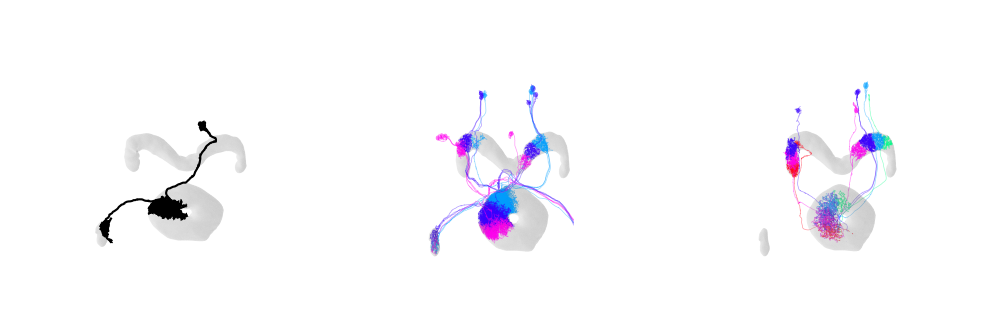

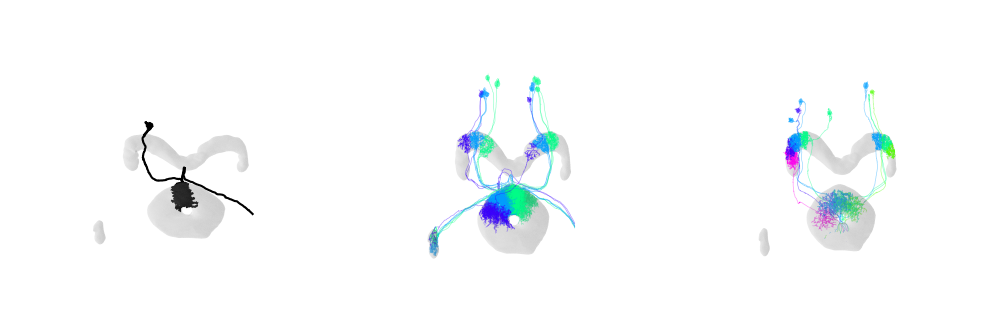

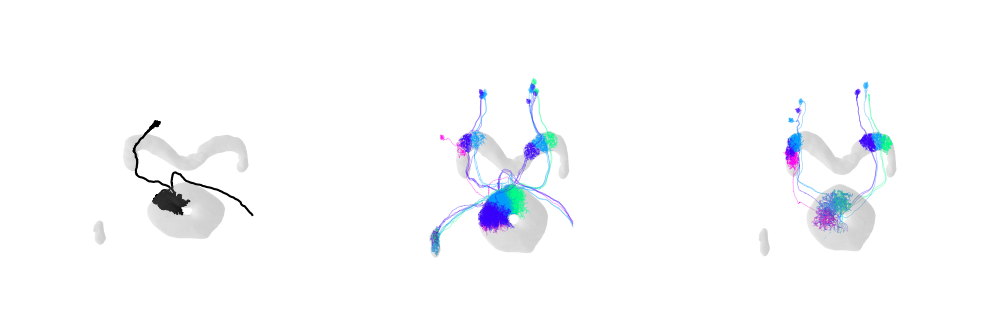

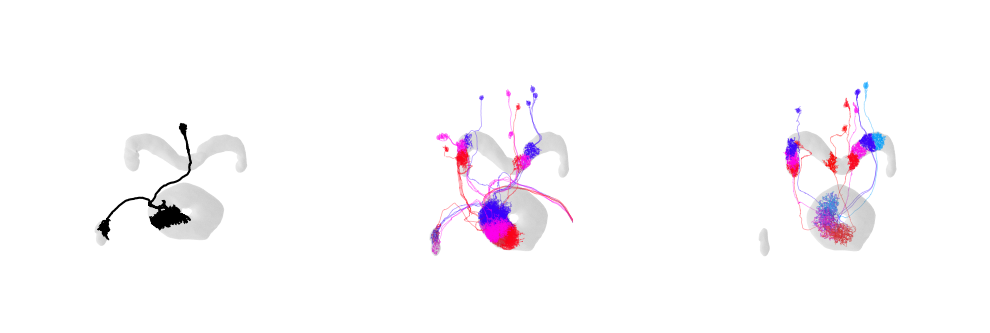

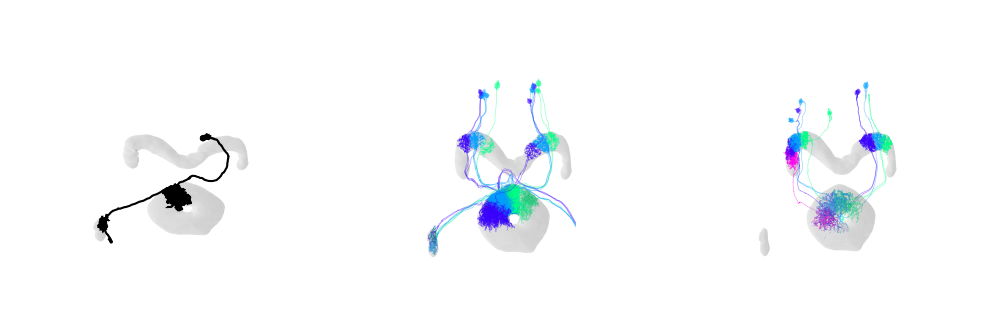

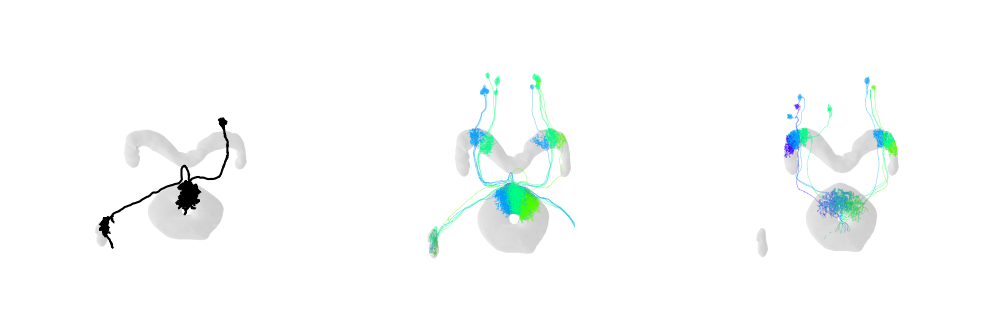

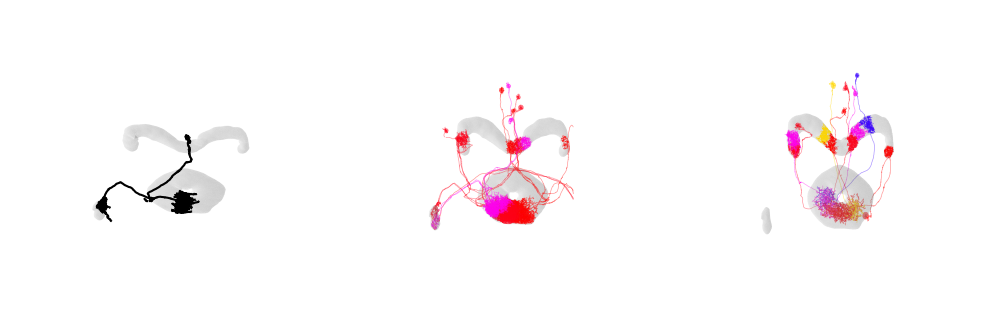

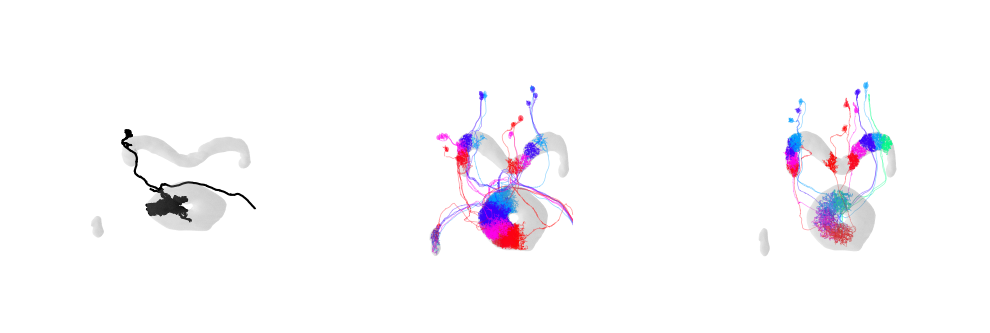

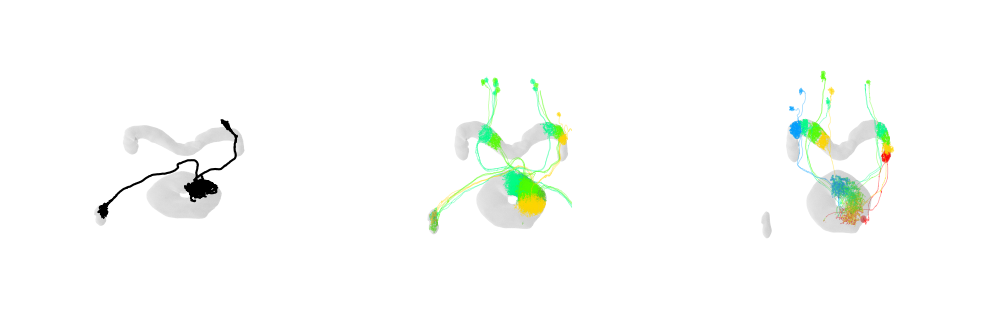

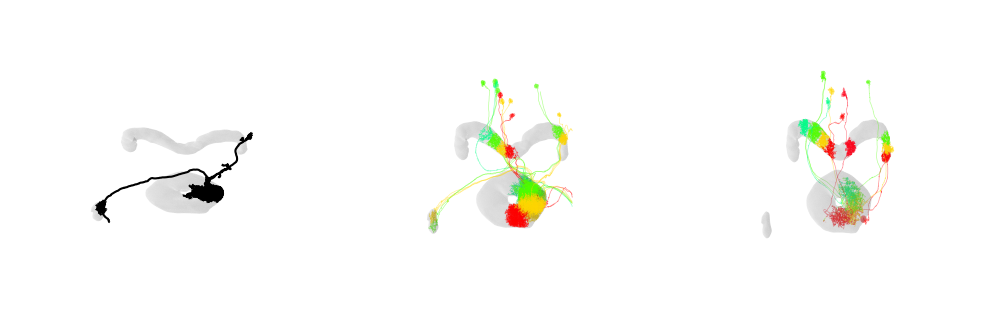

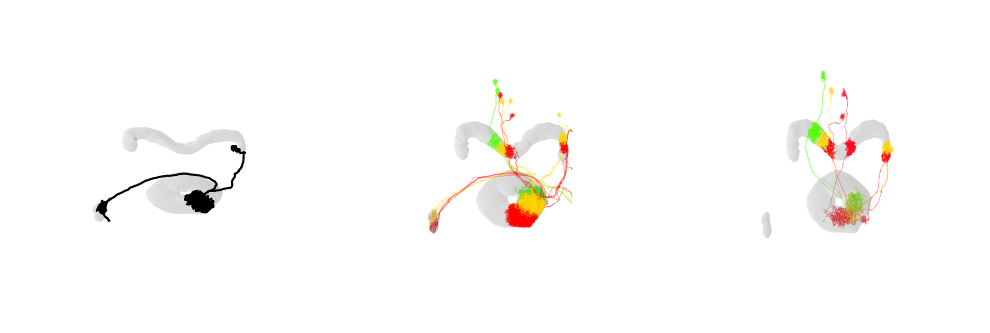

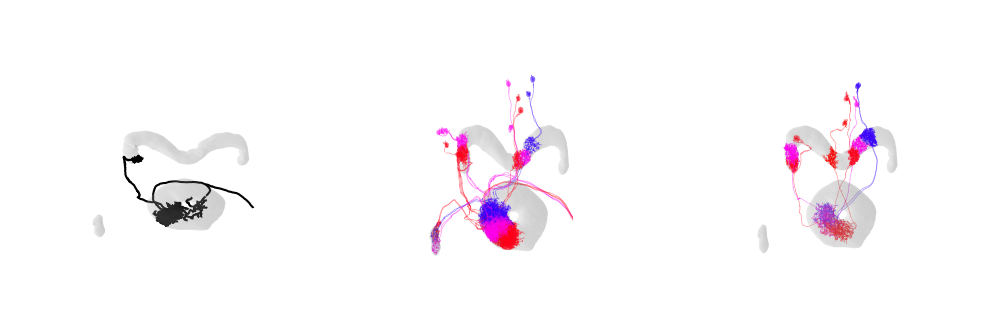

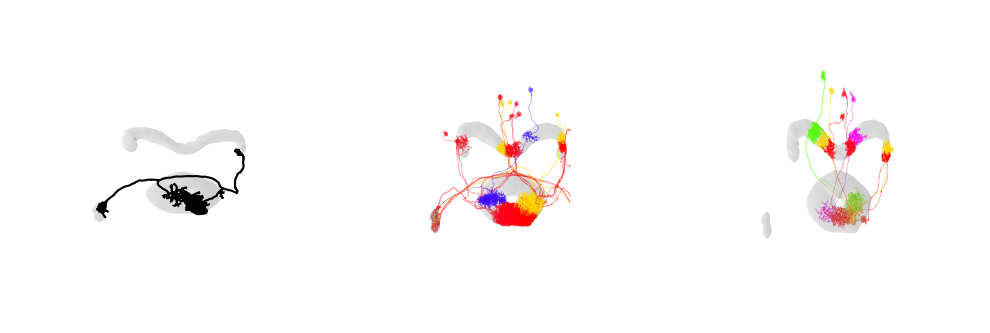

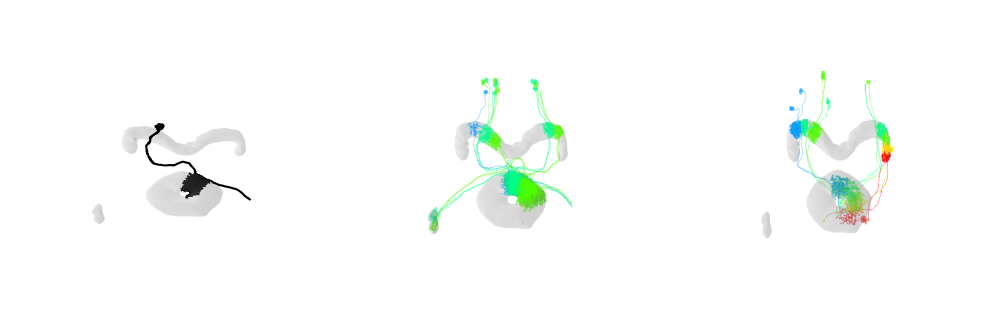

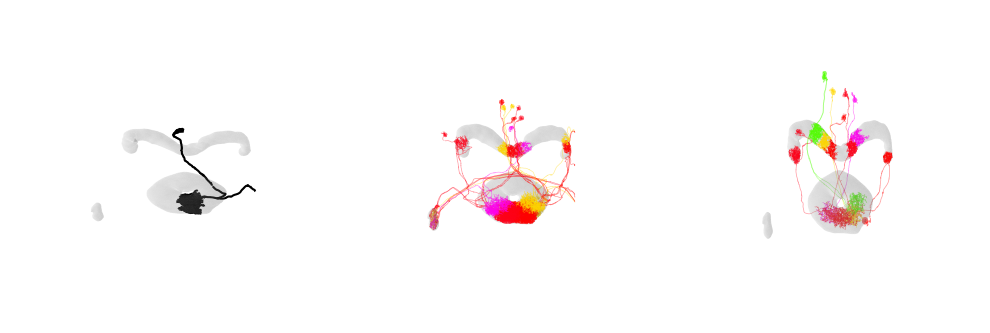

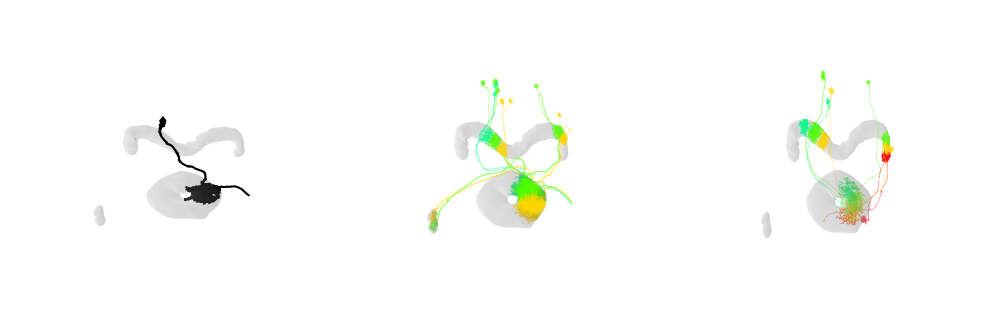

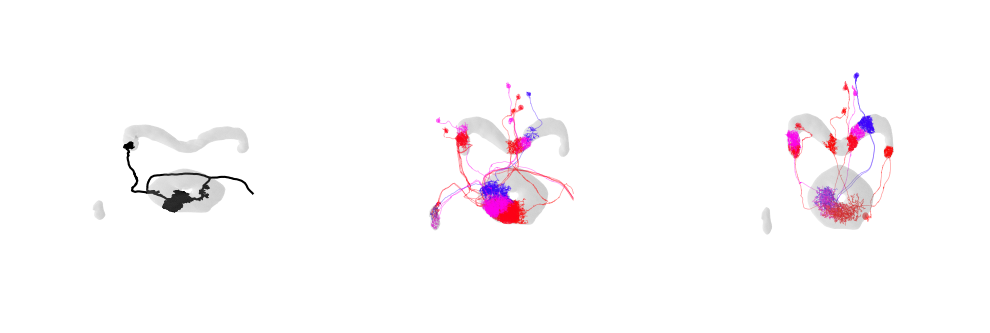

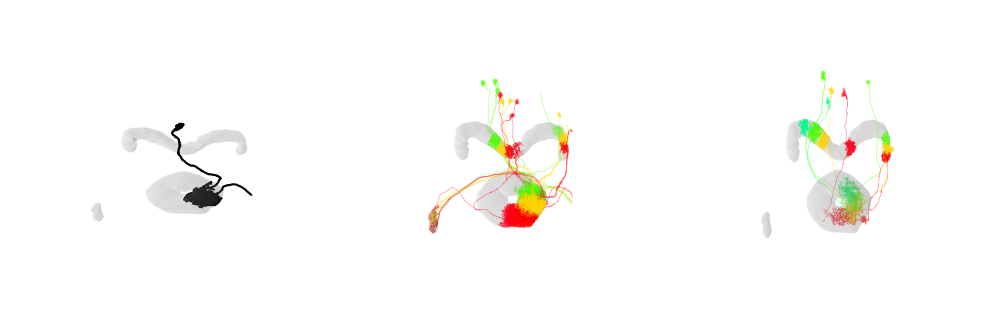

In [7]:
# get el neurons




for i, el in els_df.iloc[:].iterrows():
    
    # get all presynaptic EPGs and PENs
    pre_neurons, _ = neu.queries.fetch_adjacencies(
                                sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]), 
                                targets = [el['bodyId']],
                                rois=['EB'],
                                min_total_weight=3,
                                )
    
    pre_epgs = pre_neurons[pre_neurons['type'] == 'EPG']
    pre_epg_skeletons = neu.fetch_skeletons(pre_epgs['bodyId'])
    el_skeleton = neu.fetch_skeletons(el['bodyId'])

    fig = plt.figure(figsize=(10, 5))
    ax = [fig.add_subplot(131, projection='3d')]
    ax.append(fig.add_subplot(132, projection='3d', sharex=ax[0], sharey=ax[0], sharez=ax[0]))
    ax.append(fig.add_subplot(133, projection='3d', sharex=ax[0], sharey=ax[0], sharez=ax[0]))    
    colors = []
    for i, pre_epg in pre_epgs.iterrows():
        # print(pre_epg)
        if pre_epg['instance'] in epg_colors:
            colors.append(epg_colors[pre_epg['instance']])
        else:
            print('error')

    # colors.append((0, 1, 0))
    _ = navis.plot2d(
                    [el_skeleton, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=1,
                    color=((0,0,0)),
                    ax = ax[0],
                )
    _ = navis.plot2d(
                    [*pre_epg_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[1]
                )

   

    
    # plt.tight_layout()


    pre_pens = pre_neurons[pre_neurons['type'].str.contains('PEN_a')]
    pre_pen_skeletons = neu.fetch_skeletons(pre_pens['bodyId'])
    pre_pen_skeletons = navis.in_volume(pre_pen_skeletons, noduli, mode='OUT' )
    print(pre_pens)

    colors = []
    for i, pre_pen in pre_pens.iterrows():
        # print(pre_pen)
        if pre_pen['instance'] in pen_colors:
            colors.append(pen_colors[pre_pen['instance']])
        else:
            colors.append((1, 0, 0))

    
    _ = navis.plot2d(
                    [*pre_pen_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[2]
                )
    ax[0].elev = -20
    ax[1].elev = -20
    ax[2].elev = -20
    for a in ax:
        # a.elev = -20
        a.grid(False)
        a.set_axis_off()


    plt.tight_layout()
    fig.savefig(figfolder / f'EL{i}_pre.pdf', bbox_inches='tight')

    




# get all presynaptic EPG and PENs


# plot el with presynaptic EPGs, color EPGs by wedge

# plot el with presynaptic L PENs, color PENs by wedge

# plot el with presynaptic R PENs, color PENs by wedge






In [8]:
eb.vertices

TrackedArray([[25867.951172, 24591.279297, 16341.05957 ],
              [25814.601562, 24420.025391, 16397.980469],
              [25600.810547, 24463.072266, 16389.527344],
              ...,
              [28206.248047, 26633.550781, 24133.619141],
              [28043.789062, 26720.876953, 24139.322266],
              [28150.042969, 26689.703125, 24136.238281]])

In [9]:
from sklearn.decomposition import PCA 


eb_origin = eb.vertices.mean(axis=0)
eb_basis = PCA(n_components=3).fit(eb.vertices).components_
eb.vertices = (eb.vertices - eb_origin) @ eb_basis.T


eb_change_of_basis = lambda x: (x - eb_origin) @ eb_basis.T


phase = np.arctan2(eb.vertices[:, 1], eb.vertices[:, 0])
radius = np.sqrt(eb.vertices[:, 0]**2 + eb.vertices[:, 1]**2)

In [10]:
bins = np.linspace(-np.pi, np.pi, num=int(360/2) + 1)
phase_bin_inds = np.digitize(phase, bins) 
radius_min = [np.amin(radius[phase_bin_inds == i]) for i in range(1, len(bins))]
radius_max = [np.amax(radius[phase_bin_inds == i]) for i in range(1, len(bins))]

x = np.concatenate([bins[:-1]-2*np.pi, bins[:-1], bins[:-1]+2*np.pi])
radius_min_lookup = sp.interpolate.interp1d(x, np.concatenate([radius_min for i in range(3)]), kind='cubic')
radius_max_lookup = sp.interpolate.interp1d(x, np.concatenate([radius_max for i in range(3)]), kind='cubic')

scale_radius = lambda phase, radius: ((radius - radius_min_lookup(phase))/(radius_max_lookup(phase)-radius_min_lookup(phase)) + .2)/1.2

#  bin phases by 5 degrees
# find mesh points in bin
#  find min and max radius in bin
# get spline for min and max radii
#  define functin to scale radius based on angle



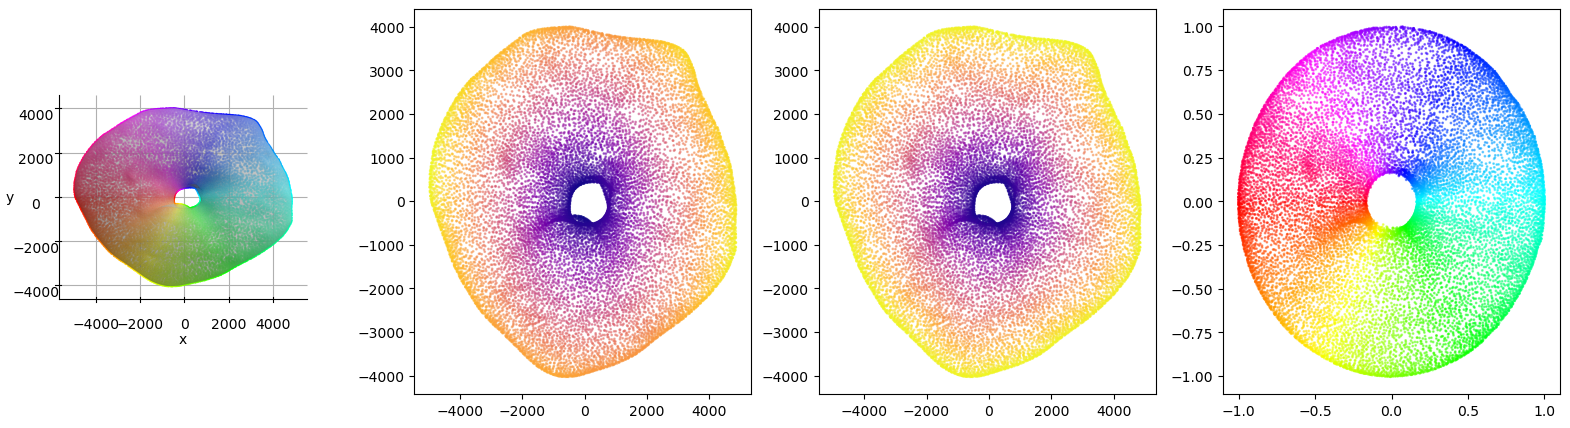

In [11]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
fig, ax = navis.plot2d(
            [eb],
            method="3d",
            connectors=False,
            linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
            view=("x", "y"),
            alpha=0.4,
            ax=ax
        )

ax.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=phase, s=1, alpha=0.5, cmap='hsv')

ax2.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=radius, s=1, alpha=0.5, cmap='plasma')
ax3.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=scale_radius(phase, radius), s=1, alpha=.5, cmap='plasma')


sc_radius = scale_radius(phase, radius)
eb_sc_x, eb_sc_y = np.cos(phase) * sc_radius, np.sin(phase) * sc_radius
ax4.scatter(eb_sc_x, eb_sc_y, c=phase, s=1, alpha=0.5, cmap='hsv')



  0%|          | 0/641 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/586 [00:00<?, ?it/s]

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/644 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

  0%|          | 0/575 [00:00<?, ?it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

  0%|          | 0/592 [00:00<?, ?it/s]

  0%|          | 0/348 [00:00<?, ?it/s]

  0%|          | 0/454 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/453 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

  0%|          | 0/536 [00:00<?, ?it/s]

  0%|          | 0/255 [00:00<?, ?it/s]

  0%|          | 0/532 [00:00<?, ?it/s]

  0%|          | 0/279 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/573 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

  0%|          | 0/207 [00:00<?, ?it/s]

  0%|          | 0/504 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/577 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/413 [00:00<?, ?it/s]

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/477 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

  0%|          | 0/457 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/494 [00:00<?, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/199 [00:00<?, ?it/s]

  0%|          | 0/351 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/305 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/346 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/317 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/356 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/216 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/267 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/264 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/284 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/242 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/217 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/302 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/266 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/249 [00:00<?, ?it/s]

  0%|          | 0/203 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/308 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/282 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

  0%|          | 0/371 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/212 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/307 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/420 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/330 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/286 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/231 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/411 [00:00<?, ?it/s]

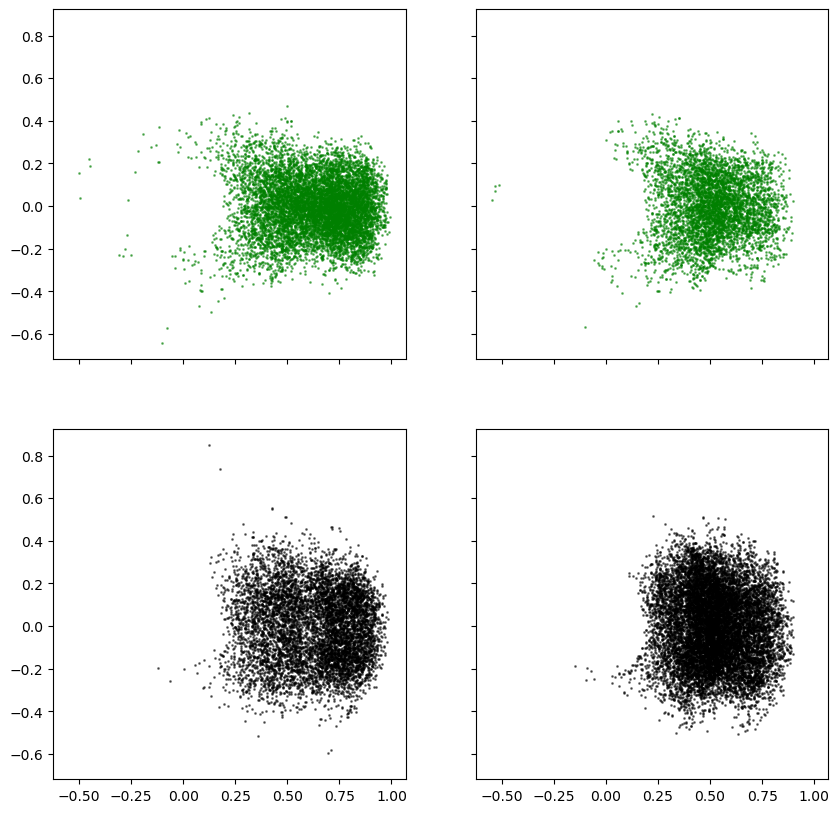

In [39]:
def scale_rotate_synapse_type(bodyId, type):
    postsynapses = neu.queries.fetch_synapse_connections(target_criteria=bodyId, source_criteria=neu.queries.NeuronCriteria(type=type), synapse_criteria=neu.queries.SynapseCriteria(type = 'post', rois=['EB']))
    postsynapses[['eb_x', 'eb_y', 'eb_z']] = eb_change_of_basis(postsynapses[['x_post', 'y_post', 'z_post']])
    postsynapses['phase'] = np.arctan2(postsynapses['eb_y'], postsynapses['eb_x'])
    postsynapses['radius'] = np.sqrt(postsynapses['eb_x']**2 + postsynapses['eb_y']**2)
    postsynapses['scaled_radius'] = scale_radius(postsynapses['phase'], postsynapses['radius'])
    postsynapses['rad_scaled_x'] = np.cos(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_y'] = np.sin(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_z'] = postsynapses['eb_z']

    avg_angle = np.angle(np.exp(1j*postsynapses['phase']).mean())

    rotated_synapes = (np.array([[np.cos(avg_angle), -1*np.sin(avg_angle), 0],
              [np.sin(avg_angle), np.cos(avg_angle), 0],
              [0, 0, 1]]).T @ postsynapses[['rad_scaled_x', 'rad_scaled_y', 'rad_scaled_z']].values.T).T
    
    postsynapses['rotated_x'] = rotated_synapes[:, 0]
    postsynapses['rotated_y'] = rotated_synapes[:, 1]
    postsynapses['rotated_z'] = rotated_synapes[:, 2]
    postsynapses['rotated_phase'] = np.arctan2(rotated_synapes[:, 1], rotated_synapes[:, 0])
    return postsynapses

# for each el
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
el_epg_synapses, el_pen_synapses = [], []
for i, el in els_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'EPG')
    el_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'PEN_a.*')
    el_pen_synapses.append(pen_postsynapses)

    

    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[0,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    ax[0,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    # print(rotated_synapes)
el_epg_synapses = pd.concat(el_epg_synapses)
el_pen_synapses = pd.concat(el_pen_synapses)




epgs_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EPG'))
epg_epg_synapses, epg_pen_synapses = [], []
# fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
for i, epg in epgs_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'EPG')
    epg_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'PEN_a.*')
    epg_pen_synapses.append(pen_postsynapses)

    
    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[1,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)
    ax[1,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)

epg_epg_synapses = pd.concat(epg_epg_synapses)
epg_pen_synapses = pd.concat(epg_pen_synapses)



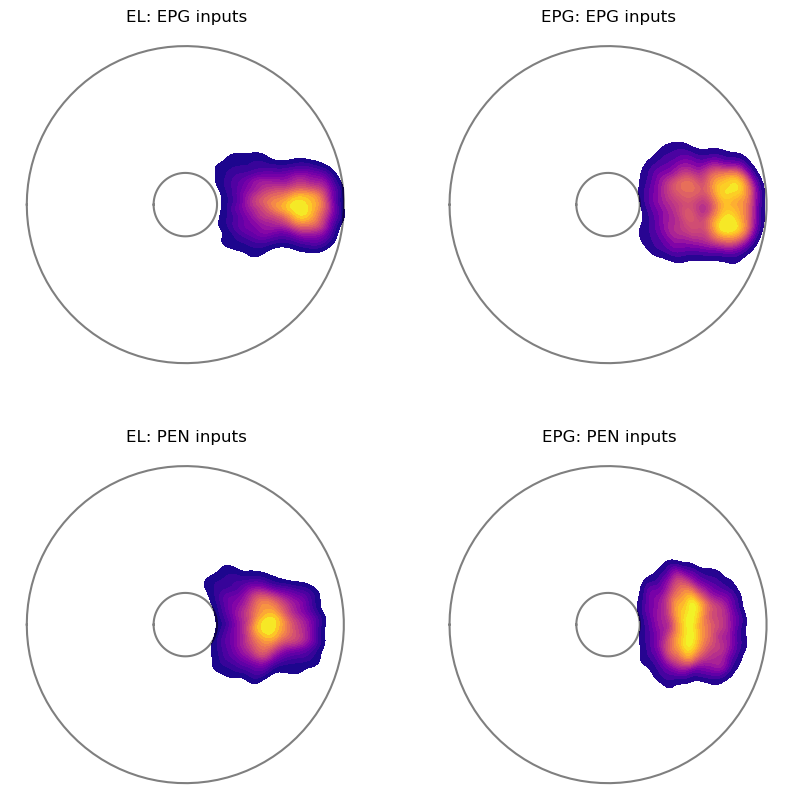

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
l = 20
sns.kdeplot(
    el_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
)
ax[0,0].set_title('EL: EPG inputs')

sns.kdeplot(
    epg_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,
   

)
ax[0,1].set_title('EPG: EPG inputs')

sns.kdeplot(
    el_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
  
)
ax[1,0].set_title('EL: PEN inputs')

sns.kdeplot(
    epg_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,

)
ax[1,1].set_title('EPG: PEN inputs')

min_rad = .2
max_rad = 1.
angles = np.linspace(-np.pi, np.pi, num=100)
for a in ax.flatten():

    a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)
    # a.set_xlim(-max_rad, max_rad)
    # a.set_ylim(-max_rad, max_rad)
   
    a.set_aspect('equal')
    a.grid(False)
    a.set_axis_off()
    # a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    # a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)

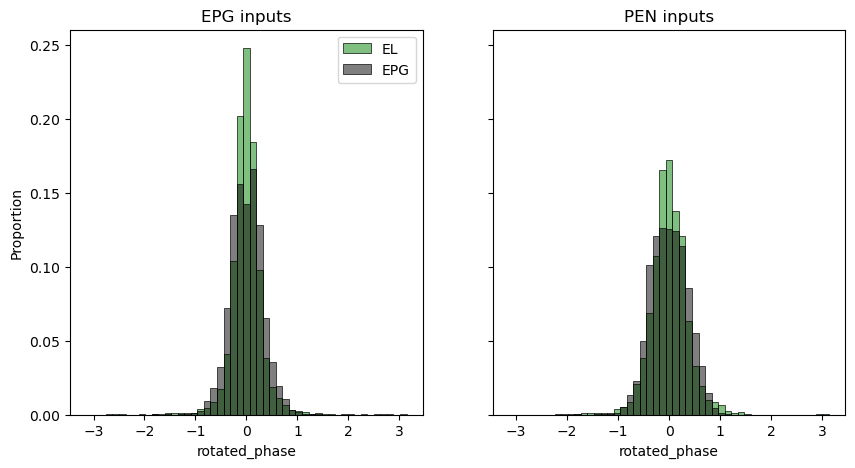

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
commmon_args = {
    'stat': 'proportion',
    'bins': np.linspace(-np.pi, np.pi, num=50),
    # 'levels': 10,
    'fill': True,
    'alpha': 0.5,
}
sns.histplot(
    el_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='green',
    label='EL',
    **commmon_args,
)

sns.histplot(
    epg_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='black',
    label='EPG',
    **commmon_args,
)

sns.histplot(
    el_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='green',
    **commmon_args,
)
sns.histplot(    
    epg_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='black',
    **commmon_args,
)

ax[0].set_title('EPG inputs')
ax[1].set_title('PEN inputs')
ax[0].legend()


In [249]:
#  for each EL, get adjacency matrix of EPGs and PENs
nrn_df, conn_df = neu.queries.fetch_adjacencies( sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]),
                                                    targets = els_df['bodyId'],
                                                    rois=['EB'],
                                                    min_total_weight=3,
                                                    )
conn_df = neu_orig.utils.merge_neuron_properties(nrn_df, conn_df, properties=['instance'])
conn_df.head()

conn_mat = neu_orig.utils.connection_table_to_matrix(conn_df, group_cols=['instance_pre', 'bodyId_post'], weight_col='weight')

In [250]:
order = ['EPG(PB08)_L1', 'EPG(PB08)_L2', 'EPG(PB08)_L3', 'EPG(PB08)_L4', 'EPG(PB08)_L5', 'EPG(PB08)_L6', 'EPG(PB08)_L7', 'EPG(PB08)_L8',
         'EPG(PB08)_R8', 'EPG(PB08)_R7', 'EPG(PB08)_R6', 'EPG(PB08)_R5', 'EPG(PB08)_R4', 'EPG(PB08)_R3', 'EPG(PB08)_R2', 'EPG(PB08)_R1',
         'PEN_a(PB06a)_L2', 'PEN_a(PB06a)_L3', 'PEN_a(PB06a)_L4', 'PEN_a(PB06a)_L5', 'PEN_a(PB06a)_L6', 'PEN_a(PB06a)_L7', 'PEN_a(PB06a)_L8', 'PEN_a(PB06a)_L9',
         'PEN_a(PB06a)_R9', 'PEN_a(PB06a)_R8', 'PEN_a(PB06a)_R7', 'PEN_a(PB06a)_R6', 'PEN_a(PB06a)_R5', 'PEN_a(PB06a)_R4', 'PEN_a(PB06a)_R3', 'PEN_a(PB06a)_R2',
         ]

epg_order = order[:16]
pen_order = order[16:]

# find avg angle of each el
avg_angles = []
for i, el in els_df.iloc[:].iterrows():
    _synapses = el_epg_synapses[el_epg_synapses['bodyId_post'] == el['bodyId']]
    print(_synapses.shape)
    avg_angles.append(np.angle(np.exp(1j*_synapses['phase'].values).mean()))

avg_angles = np.array(avg_angles)
el_order = els_df['bodyId'].values[np.argsort(avg_angles)]
print(el_order)


conn_mat = conn_mat.reindex(pen_order[:8], axis=0).reindex(columns=np.roll(el_order, 4))

(641, 25)
(586, 25)
(644, 25)
(575, 25)
(592, 25)
(454, 25)
(453, 25)
(536, 25)
(532, 25)
(435, 25)
(573, 25)
(498, 25)
(504, 25)
(577, 25)
(413, 25)
(477, 25)
(457, 25)
(494, 25)
[ 696682163  725951660  820144012  725942718  912596952 1192152791
 1036753721 1321140852 1066088381 1508369047 1137288015 1168340507
 1292882359 1005308608 1447253749 1167965225  727350004 1034220115]


<Axes: xlabel='instance_pre', ylabel='bodyId_post'>

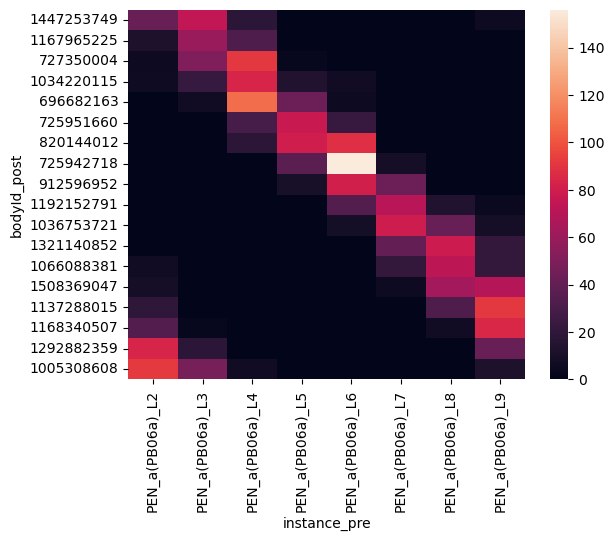

In [251]:

sns.heatmap(conn_mat.T)
# sort bodyId by avg angle

# find closest el to EPGL1, 
    # shift el order to start with closest el


<Axes: xlabel='instance_pre', ylabel='bodyId_post'>

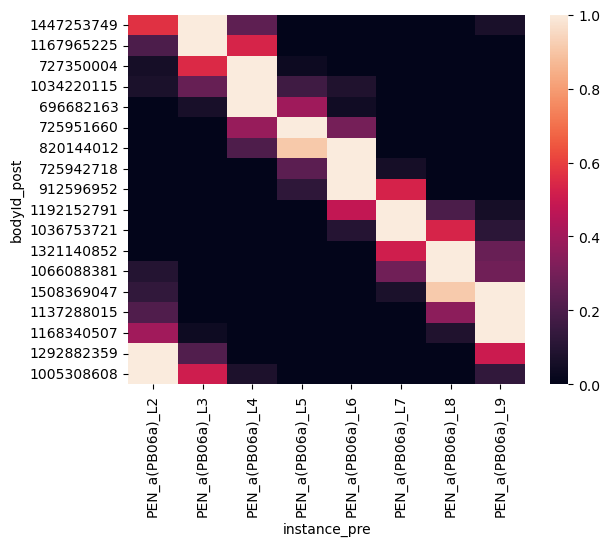

In [252]:
el_conn_mat_norm = conn_mat.apply(lambda x: x/np.amax(x), axis=0)

sns.heatmap(el_conn_mat_norm.T)

In [253]:
el_conn_mat_norm.head()

bodyId_post,1447253749,1167965225,727350004,1034220115,696682163,725951660,820144012,725942718,912596952,1192152791,1036753721,1321140852,1066088381,1508369047,1137288015,1168340507,1292882359,1005308608
instance_pre,,,,,,,,,,,,,,,,,,
PEN_a(PB06a)_L2,0.567568,0.200000,0.054945,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.09589,0.130435,0.208791,0.400000,1.000000,1.000000
PEN_a(PB06a)_L3,1.000000,1.000000,0.549451,0.261905,0.064815,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.035294,0.214286,0.510870
PEN_a(PB06a)_L4,0.243243,0.533333,1.000000,1.000000,1.000000,0.376623,0.204545,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.076087
PEN_a(PB06a)_L5,0.000000,0.000000,0.032967,0.166667,0.398148,1.000000,0.909091,0.237179,0.123457,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
PEN_a(PB06a)_L6,0.000000,0.000000,0.000000,0.083333,0.046296,0.298701,1.000000,1.000000,1.000000,0.478873,0.101266,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


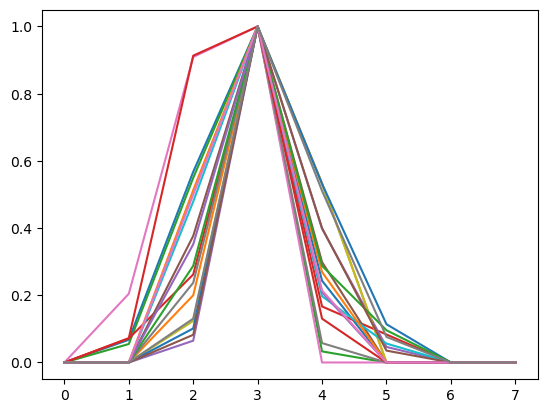

In [254]:
fig, ax = plt.subplots()
for i, conn in el_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), label=i)
    # ax.plot(np.sort(conn.values)[::-1])

    # plt.figure(figsize=(10, 5))
    # sns.heatmap(conn.values.reshape(2, 16), cmap='plasma', cbar=False)
    # plt.title(i)
    # plt.savefig(figfolder / f'conn_{i}.pdf', bbox_inches='tight')
    # plt.close()

<Axes: xlabel='instance_pre', ylabel='instance_post'>

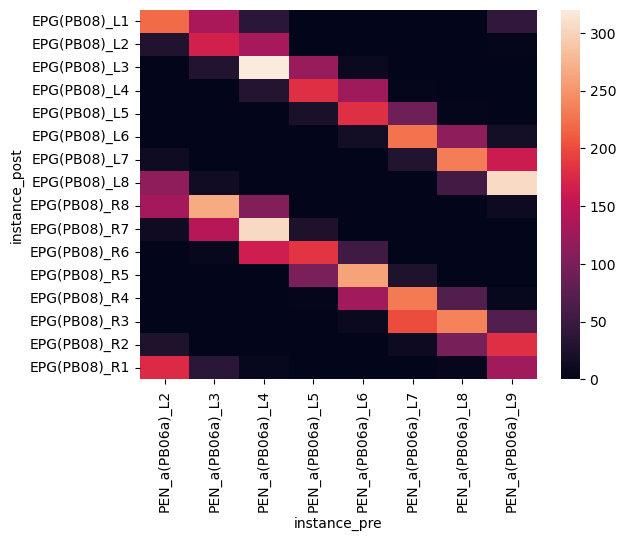

In [255]:
#  for each EL, get adjacency matrix of EPGs and PENs
nrn_df, conn_df = neu.queries.fetch_adjacencies( sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]),
                                                    targets = epgs_df['bodyId'],
                                                    rois=['EB'],
                                                    min_total_weight=3,
                                                    )
conn_df = neu_orig.utils.merge_neuron_properties(nrn_df, conn_df, properties=['instance'])
conn_df.head()

conn_mat = neu_orig.utils.connection_table_to_matrix(conn_df, group_cols=['instance_pre', 'instance_post'], weight_col='weight')
conn_mat = conn_mat.reindex(pen_order[:8], axis=0).reindex(columns=epg_order[:])
sns.heatmap(conn_mat.T)

<Axes: xlabel='instance_pre', ylabel='instance_post'>

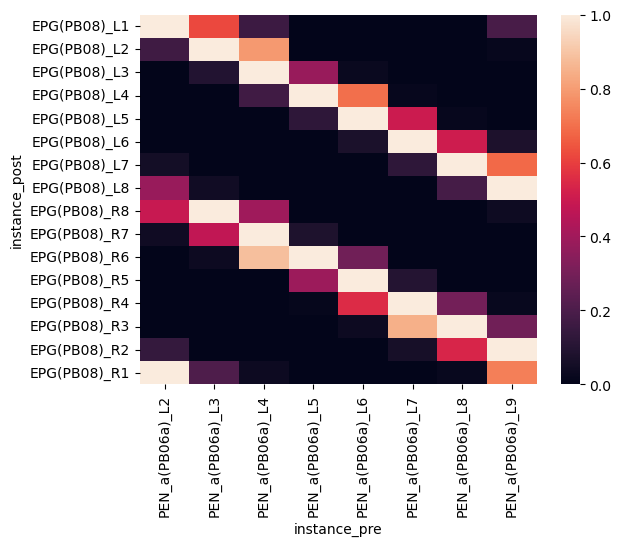

In [256]:
epg_conn_mat_norm = conn_mat.apply(lambda x: x/np.amax(x), axis=0)

sns.heatmap(epg_conn_mat_norm.T)

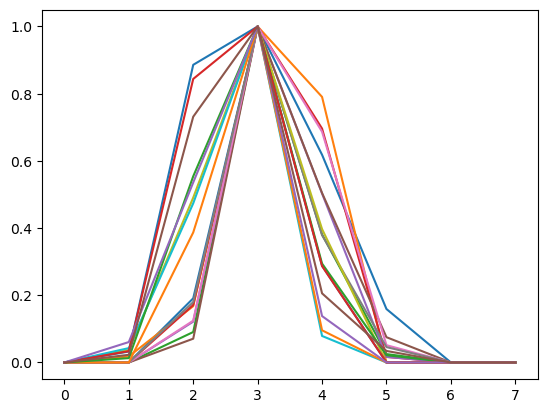

In [257]:
fig, ax = plt.subplots()
for i, conn in epg_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), label=i)

# fig, ax = plt.subplots()
# for i, conn in conn_mat_norm.iterrows():
#     ax.plot(np.sort(conn.values)[::-1])


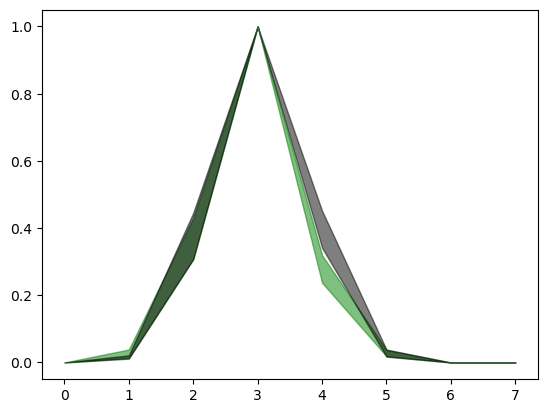

In [258]:
fig, ax = plt.subplots()
el_ = []
for i, conn in el_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    # ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), color='green')
    el_.append(np.roll(conn.values,-np.argmax(conn.values)+3))
el_ = np.array(el_)
mu, sem = el_.mean(axis=0), sp.stats.sem(el_, axis=0)
ax.fill_between(range(len(mu)), mu-sem, mu+sem, color='green', alpha=0.5, label='EL')

epg_ = []
for i, conn in epg_conn_mat_norm.T.iterrows():
    # np.argmax(conn.values)
    # ax.plot(np.roll(conn.values,-np.argmax(conn.values)+3), color='black')
    epg_.append(np.roll(conn.values,-np.argmax(conn.values)+3))
epg_ = np.array(epg_)
mu, sem = epg_.mean(axis=0), sp.stats.sem(epg_, axis=0)
ax.fill_between(range(len(mu)), mu-sem, mu+sem, color='black', alpha=0.5, label='EPG')